In [ ]:
from utils import plot_2
plot_2("results/data/pretrain_drop1_mfcc_smoothTrue_epoch100_l2re1_lr0002_train_metric.npy", "now")

In [ ]:
import torch
model = torch.load("pretrain_model.pt")
model_dict = model.state_dict()
# for k, v in model_dict.items():
#     print(k)

model_ = torch.load("models/model_drop1_mfcc_smoothTrue_epoch50_l2re1_lr0001_best.pt")
model_dict_ = model_.state_dict()
# for k, v in model_dict_.items():
#     print(k)
pretrained_dict = {k.replace("extractor", "generalFeatureExtractor"): v for k, v in model_dict.items() if k.replace("extractor", "generalFeatureExtractor") in model_dict_}
for k, v in pretrained_dict.items():
    print(k)


In [ ]:
from test_files import test_
test_(
    model_path="models/train_order3_drop1_mfcc_smoothTrue_epoch60_l2re1_lr0002_pretrainTrue_best.pt", wav_path="preprocess/MODMA_16kHz", num=100, num_class=2, order=3)


In [ ]:
import torch
import torch.nn as nn
from einops.layers.torch import Rearrange
model1 = nn.Sequential(
    Rearrange("N L C W -> N L (C W)"),
    Rearrange("N L C -> N C L"),
)
model2 = Rearrange("N L C W -> N C (L W)")
x = torch.rand([4,313,39,1])
y1 = model1(x)
y2 = model2(x)
print(torch.sum(torch.abs(y1-y2)))

In [ ]:
from utils import myDataset
import numpy as np
import torch.utils.data
x = np.arange(20)
y = np.arange(20)
dataset = myDataset(x, y)
loader = torch.utils.data.dataloader.DataLoader(
    dataset=dataset,
    batch_size=8,
    shuffle=False
)
train_iter = iter(loader)
print(len(loader))
for _ in range(10):
    try:
        print(next(train_iter))
    except StopIteration:
        train_iter = iter(loader)
        print(next(train_iter))

In [ ]:
import torch.nn as nn
import torch
from utils import print_model
class simplemodel(nn.Module):
    def __init__(self):
        super(simplemodel, self).__init__()
        self.base = nn.Linear(4,4, bias=False)
        self.l1 = nn.Linear(4,3, bias=False)
        self.l2 = nn.Linear(4,2, bias=False)
    def forward(self, x, flag):
        x = self.base(x)
        if flag:
            x = self.l1(x)
        else:
            x = self.l2(x)
        return x

model = simplemodel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
x = torch.rand([4,4])
y1_ = torch.rand([4,3])
y2_ = torch.rand([4,2])
y1 = model(x, True)
y2 = model(x, False)
loss1 = torch.nn.CrossEntropyLoss()(y1, y1_)
loss2 = torch.nn.CrossEntropyLoss()(y2, y2_)
loss = loss1+loss2
optimizer.zero_grad()
loss.backward()
print_model(model)
optimizer.step()

In [ ]:
from utils import plot
import numpy as np
hubert_data = np.load("ser_pretrain/results/hubert.npy", allow_pickle=True).item()
# plot(wav2vec2_data, model_name="hubert",result_path="ser_pretrain/results/")
print(np.max(hubert_data['val_acc']))
print(hubert_data['train_acc'][np.argmax(hubert_data['val_acc'])])

d:\python3_7\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
d:\python3_7\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
d:\python3_7\lib\site-packages\torch\optim\lr_scheduler.py:729: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


0.010079629669929565


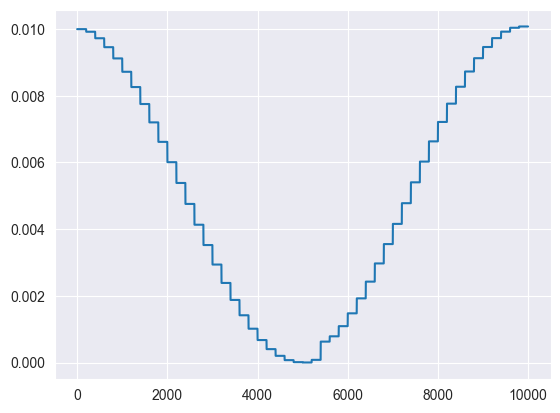

In [3]:
import numpy as np
import torch
from torchvision import models
import matplotlib.pyplot as plt

net = models.resnet18(pretrained=False)


max_epoch=50 # 一共50 epoch
iters=200    # 每个epoch 有 200 个 bach

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(optimizer = optimizer,
                                                        T_max =  max_epoch/2, eta_min=1e-6) #  * iters

lr = []
for epoch in range(max_epoch):
    for batch in range(iters):
        optimizer.step()


        lr.append(scheduler.get_lr()[0])
    scheduler.step() # 注意 每个epoch 结束， 更新learning rate
print(lr[-1])
plt.plot(np.arange(len(lr)), lr)
plt.show()
# plt.savefig('aa.jpg')



In [3]:
from CNN import SpatialDropout
import torch

sd = SpatialDropout(0.1)
x = torch.randn([2, 4, 8])
y = sd(x)
print(y)

tensor([[[-0.6320, -0.9299,  0.6613,  0.0000,  1.4600,  1.9067,  0.6700,
           0.0000],
         [-1.1087,  0.5929, -1.5662,  0.0000,  0.2133, -0.4725, -0.6043,
           0.0000],
         [-0.5921, -1.4446,  0.4838,  0.0000,  1.7272, -0.0903,  0.4559,
           0.0000],
         [ 0.6796,  0.4075, -0.1967,  0.0000,  0.6015,  2.3097,  1.4803,
          -0.0000]],

        [[ 2.1429,  1.6390,  2.0908,  0.2664,  1.6322, -0.2003, -1.3874,
           1.5855],
         [-0.1589,  0.7866, -1.3509,  0.6646,  1.7225,  0.9628,  1.1001,
          -0.6886],
         [ 1.1371,  0.1399, -1.8018, -0.0157, -1.1171, -1.9877,  0.3964,
           0.6308],
         [-0.4081,  2.4424, -1.7956,  1.4307, -1.3278, -0.1320,  0.7493,
          -0.5080]]])


In [7]:
import torch.nn as nn
import torch
class mulModel(nn.Module):
    def __init__(self) -> None:
        super(mulModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=39, out_channels=10, kernel_size=3, padding="same")
        self.conv2 = nn.Conv1d(in_channels=10, out_channels=39, kernel_size=3, padding="same")
    def forward(self, x):
        identity = x
        x = self.conv1(x)
        x = self.conv2(x)
        x = torch.mul(identity, x)
        return x

class addModel(nn.Module):
    def __init__(self) -> None:
        super(addModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=39, out_channels=10, kernel_size=3, padding="same")
        self.conv2 = nn.Conv1d(in_channels=10, out_channels=39, kernel_size=3, padding="same")
    def forward(self, x):
        identity = x
        x = self.conv1(x)
        x = self.conv2(x)
        x = torch.add(identity, x)
        return x

model = mulModel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_f = torch.nn.MSELoss()
x = torch.randn([4, 39, 100])
y = torch.randn([4, 39, 100])
for i in range(50):
    out = model(x)
    loss = loss_f(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(torch.sum(torch.abs(y-model(x))))
torch.save(model, "test.pt")

tensor(12094.7764, grad_fn=<SumBackward0>)


In [14]:
from utils import print_model
new_model = addModel()
model = torch.load("test.pt")
new_model.load_state_dict(model.state_dict())
out = new_model(x)
print(torch.sum(torch.abs(y-out)))

tensor(17864.3652, grad_fn=<SumBackward0>)


1x1卷积的作用：降低特征提取时的计算量，降低模型复杂度

In [37]:
import torch.nn as nn
import torch
import time
class simpleModel_1(nn.Module): # 不使用1x1卷积
    def __init__(self) -> None:
        super(simpleModel_1, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=39, out_channels=39, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=39, out_channels=39, kernel_size=3)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

class simpleModel_2(nn.Module): # 使用1x1卷积
    def __init__(self) -> None:
        super(simpleModel_2, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=39, out_channels=13, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=13, out_channels=13, kernel_size=3)
        self.conv3 = nn.Conv1d(in_channels=13, out_channels=39, kernel_size=1)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

x = torch.randn([64, 39, 313])
model1 = simpleModel_1()
model2 = simpleModel_2()
a1 = time.time()
y = model1(x)
a2 = time.time()
print(a2-a1)

a1 = time.time()
y = model2(x)
a2 = time.time()
print(a2-a1)

0.012032747268676758
0.008971214294433594


用于通道整合

In [30]:
import torch.nn as nn
import torch
import time
class simpleModel_1(nn.Module):
    def __init__(self) -> None:
        super(simpleModel_1, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=39, out_channels=39, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=39, out_channels=39, kernel_size=3)
    def forward(self, x):
        x_f = self.conv1(x)
        x_b = self.conv2(x)
        return torch.add(x_b, x_f)

class simpleModel_2(nn.Module):
    def __init__(self) -> None:
        super(simpleModel_2, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=39, out_channels=39, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=39, out_channels=39, kernel_size=3)
        self.conv3 = nn.Conv1d(in_channels=78, out_channels=39, kernel_size=1)
    def forward(self, x):
        x_f = self.conv1(x)
        x_b = self.conv2(x)
        x = self.conv3(torch.cat([x_f, x_b], dim=1))

x = torch.randn([64, 39, 313])
model1 = simpleModel_1()
model2 = simpleModel_2()
a1 = time.time()
y = model1(x)
a2 = time.time()
print(a2-a1)

a1 = time.time()
y = model2(x)
a2 = time.time()
print(a2-a1)

0.011861324310302734
0.017818212509155273


In [4]:
import copy
class a:
    def __init__(self):
        self.x = 1

a1 = a()
def fun(a1: a):
    a1 = copy.deepcopy(a1)
    a1.x = 10
    print(a1.x)
print(a1.x)
fun(a1)
print(a1.x)

1
10
1


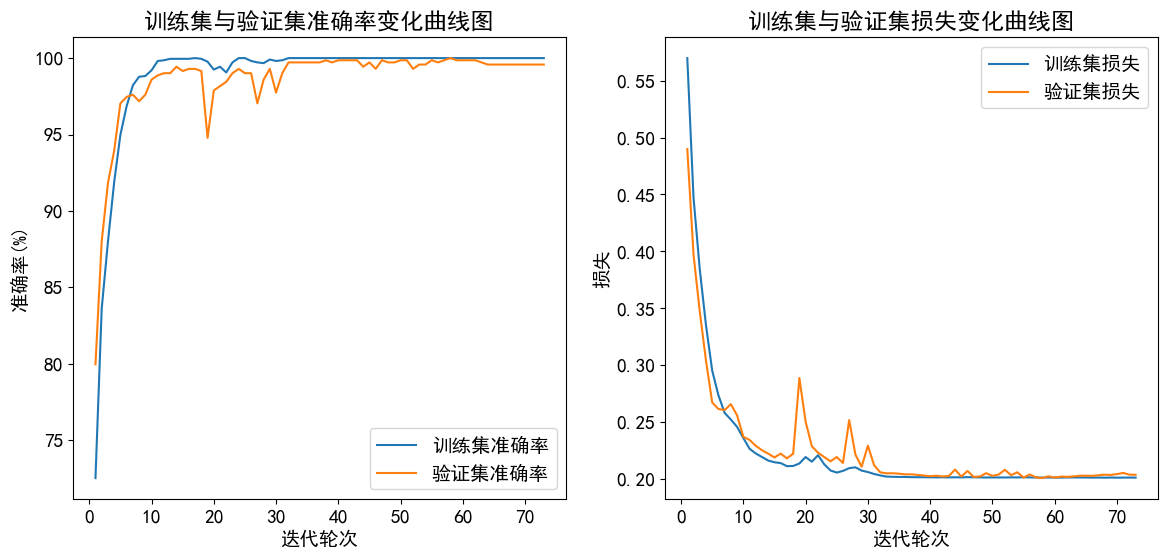

In [6]:
from utils import plot_2
plot_2(path="stores/results/data/MTCN_AT_DIFF_MODMA_order3_drop1_epoch100_l2re2_lr0004_pretrainFalse_train_metric.npy",name="MTCN_acc_and_loss", result_path="stores/results/")

In [2]:
import numpy as np
# data = np.load("stores/results/data/MultiTIM_finetune_AT_DIFF_MODMA_order3_drop1_mfcc_epoch100_l2re2_lr0004_pretrainTrue_clusterFalse_test_metric.npy", allow_pickle=True).item()
data = np.load("stores/results/data/new/test_1.npy", allow_pickle=True).item()
print(data)

{'test_acc': [tensor(0.9930, device='cuda:0'), tensor(0.9916, device='cuda:0')], 'test_loss': [0.042924527059643225, 0.03573768596561422]}


In [1]:
from preprocess.process_utils import data_distribution, load_MultiDataset_V2, CASIA_code
# data_distribution(path="preprocess/datasets/CASIA", step=1)
load_MultiDataset_V2(path="preprocess/datasets/CASIA", code=CASIA_code, duration=6, )

mean: 
2.065164331597222
std: 
0.8299153548129508
max: 
7.40025
min: 
0.6266875


(0, 1]     221
(1, 2]    4014
(2, 3]    2050
(3, 4]     659
(4, 5]     204
(5, 6]      44
(6, 7]       7
(7, 8]       1
dtype: int64

In [3]:
from utils import plot_2
import numpy as np
data = np.load("stores/results/data/hubert/hubert_modma.npy", allow_pickle=True).item()
print(data['val_acc'])
# plot_2("stores/results/data/hubert/hubert_modma.npy", name="hubert_modma")

[0.9506346967559943, 0.9858956276445698, 0.9012693935119888, 0.9858956276445698, 0.9858956276445698, 0.9887165021156559, 0.9802538787023978, 0.9943582510578279, 0.9943582510578279, 0.998589562764457, 0.997179125528914, 0.997179125528914, 0.9943582510578279, 0.997179125528914, 0.998589562764457, 0.998589562764457, 0.9929478138222849, 0.998589562764457, 0.998589562764457, 0.997179125528914, 0.995768688293371, 0.998589562764457, 1.0, 1.0, 0.998589562764457, 0.995768688293371, 0.995768688293371, 0.995768688293371, 0.997179125528914, 0.995768688293371]


In [4]:
from transformers import Wav2Vec2Processor
from utils import print_model
model_name_or_path = "facebook/wav2vec2-base"
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
# print_model(processor)
# print()

d:\python3_7\lib\site-packages\transformers\configuration_utils.py:376: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "
